## Doing some basic EDA on the dataframe that has the genres included. (This first part was before I found the outliers for number of episodes per season.)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Load data
dummy_genre_df = pd.read_pickle('clean_with_dummy_genres.pkl')

# Take a look at the datatypes
dummy_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    1000 non-null   object 
 1   Start_Year               1000 non-null   int64  
 2   End_Year                 1000 non-null   int64  
 3   Genres                   1000 non-null   object 
 4   Num_of_Seasons           1000 non-null   int64  
 5   Num_of_Episodes          1000 non-null   int64  
 6   Num_Episodes_Per_Season  1000 non-null   float64
 7   Season_1_Rating          1000 non-null   float64
 8   Years_Ran                1000 non-null   int64  
 9   Action                   1000 non-null   int64  
 10  Adventure                1000 non-null   int64  
 11  Animation                1000 non-null   int64  
 12  Biography                1000 non-null   int64  
 13  Comedy                   1000 non-null   int64  
 14  Crime                    

In [3]:
# Load a copy in case i mess up
copy_dummy_genre_df = pd.read_pickle('clean_with_dummy_genres.pkl')

In [6]:
dummy_genre_df.head()

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,...,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1,0,...,1,0,0,0,0,0,0,0,1,0
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8,1,...,0,0,0,0,0,0,0,0,0,0
2,Black Mirror,2011,0,"[Drama, Sci-fi, Thriller]",5,22,4.40,8.1,9,0,...,0,0,0,0,0,0,1,0,1,0
3,Sherlock,2010,2017,"[Drama, Crime, Mystery]",4,12,3.00,8.8,7,0,...,0,0,0,1,0,0,0,0,0,0
4,Breaking Bad,2008,2013,"[Drama, Crime, Thriller]",5,62,12.40,8.8,5,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
dummy_genre_df.shape

(1000, 29)

In [8]:
dummy_genre_df.corr()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
Start_Year,1.000000,-0.353229,-0.547924,-0.527568,-0.244184,-0.013036,-0.587728,-0.061381,-0.069251,-0.125625,...,0.041833,0.040804,-0.005238,-0.037548,0.002769,-0.062701,0.069941,-0.002125,0.118156,0.022808
End_Year,-0.353229,1.000000,0.000263,0.046137,0.094488,0.000531,-0.089885,0.044169,0.036978,-0.029178,...,0.044244,-0.015852,0.031380,0.061002,-0.068347,0.014279,0.058487,-0.019870,-0.095053,0.025328
Num_of_Seasons,-0.547924,0.000263,1.000000,0.869856,0.170843,0.014056,0.838630,-0.022100,0.017520,0.052608,...,-0.098640,-0.046404,-0.028656,0.034090,0.060047,0.065778,-0.094706,0.013051,-0.057738,-0.048118
Num_of_Episodes,-0.527568,0.046137,0.869856,1.000000,0.449731,0.010600,0.733839,0.063174,0.074785,0.134527,...,-0.107959,-0.044405,-0.020083,-0.007464,0.007679,0.103427,-0.089346,-0.003238,-0.078237,-0.039545
Num_Episodes_Per_Season,-0.244184,0.094488,0.170843,0.449731,1.000000,-0.006465,0.168331,0.211895,0.215664,0.301622,...,-0.089630,-0.018205,0.005221,-0.051405,-0.033469,0.008437,-0.030323,-0.026853,-0.057967,-0.019122
Season_1_Rating,-0.013036,0.000531,0.014056,0.010600,-0.006465,1.000000,0.018008,-0.021441,-0.087592,0.017565,...,0.073166,-0.153902,0.030705,-0.079981,0.023516,0.052967,-0.110556,0.041521,-0.002036,0.045428
Years_Ran,-0.587728,-0.089885,0.838630,0.733839,0.168331,0.018008,1.000000,-0.051337,-0.005973,0.089294,...,-0.091266,-0.051807,-0.026095,0.056457,0.040509,0.055948,-0.114965,0.024681,-0.054106,-0.051309
Action,-0.061381,0.044169,-0.022100,0.063174,0.211895,-0.021441,-0.051337,1.000000,0.450821,0.279665,...,-0.073818,-0.093546,-0.055239,-0.203003,-0.063975,-0.139050,0.007756,-0.065492,-0.063631,0.022878
Adventure,-0.069251,0.036978,0.017520,0.074785,0.215664,-0.087592,-0.005973,0.450821,1.000000,0.382896,...,-0.068547,-0.104745,-0.042716,-0.163728,-0.023500,-0.092733,-0.042964,-0.050644,-0.132843,-0.040503
Animation,-0.125625,-0.029178,0.052608,0.134527,0.301622,0.017565,0.089294,0.279665,0.382896,1.000000,...,-0.072990,-0.037440,0.006999,-0.139567,-0.017919,-0.065633,-0.071188,-0.035376,-0.092794,-0.028292


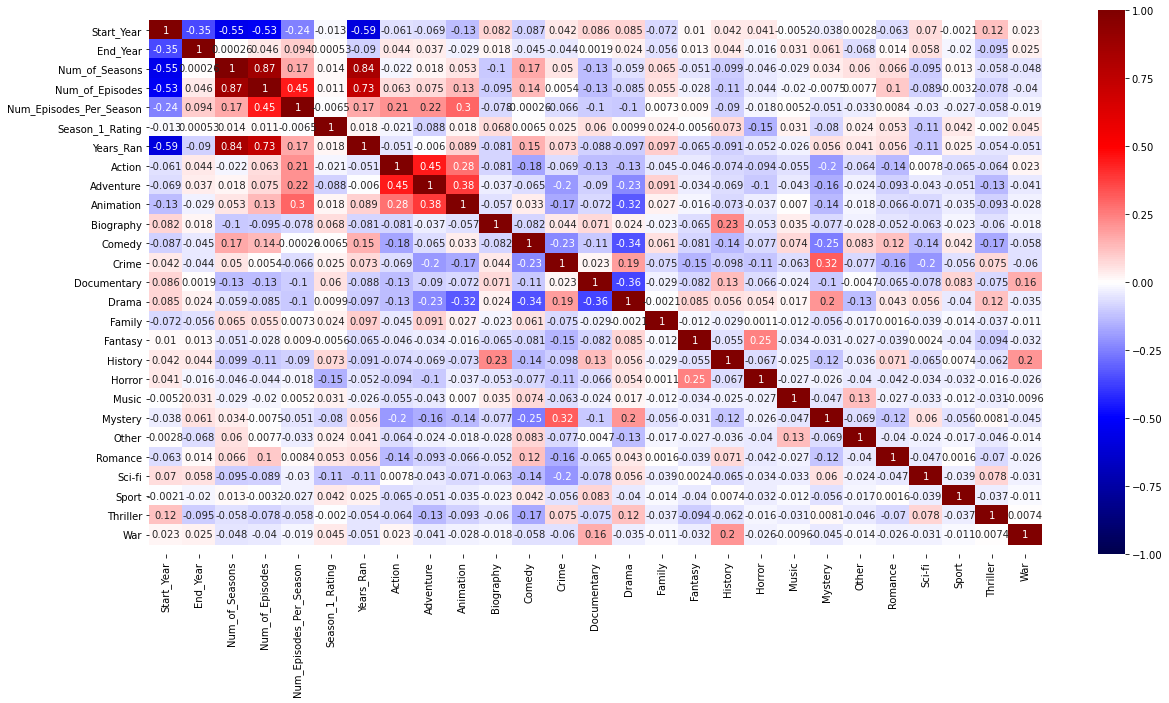

In [13]:
# try a heatmap for the corr matrix
plt.figure(figsize = (20,10))
sns.heatmap(dummy_genre_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(dummy_genre_df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


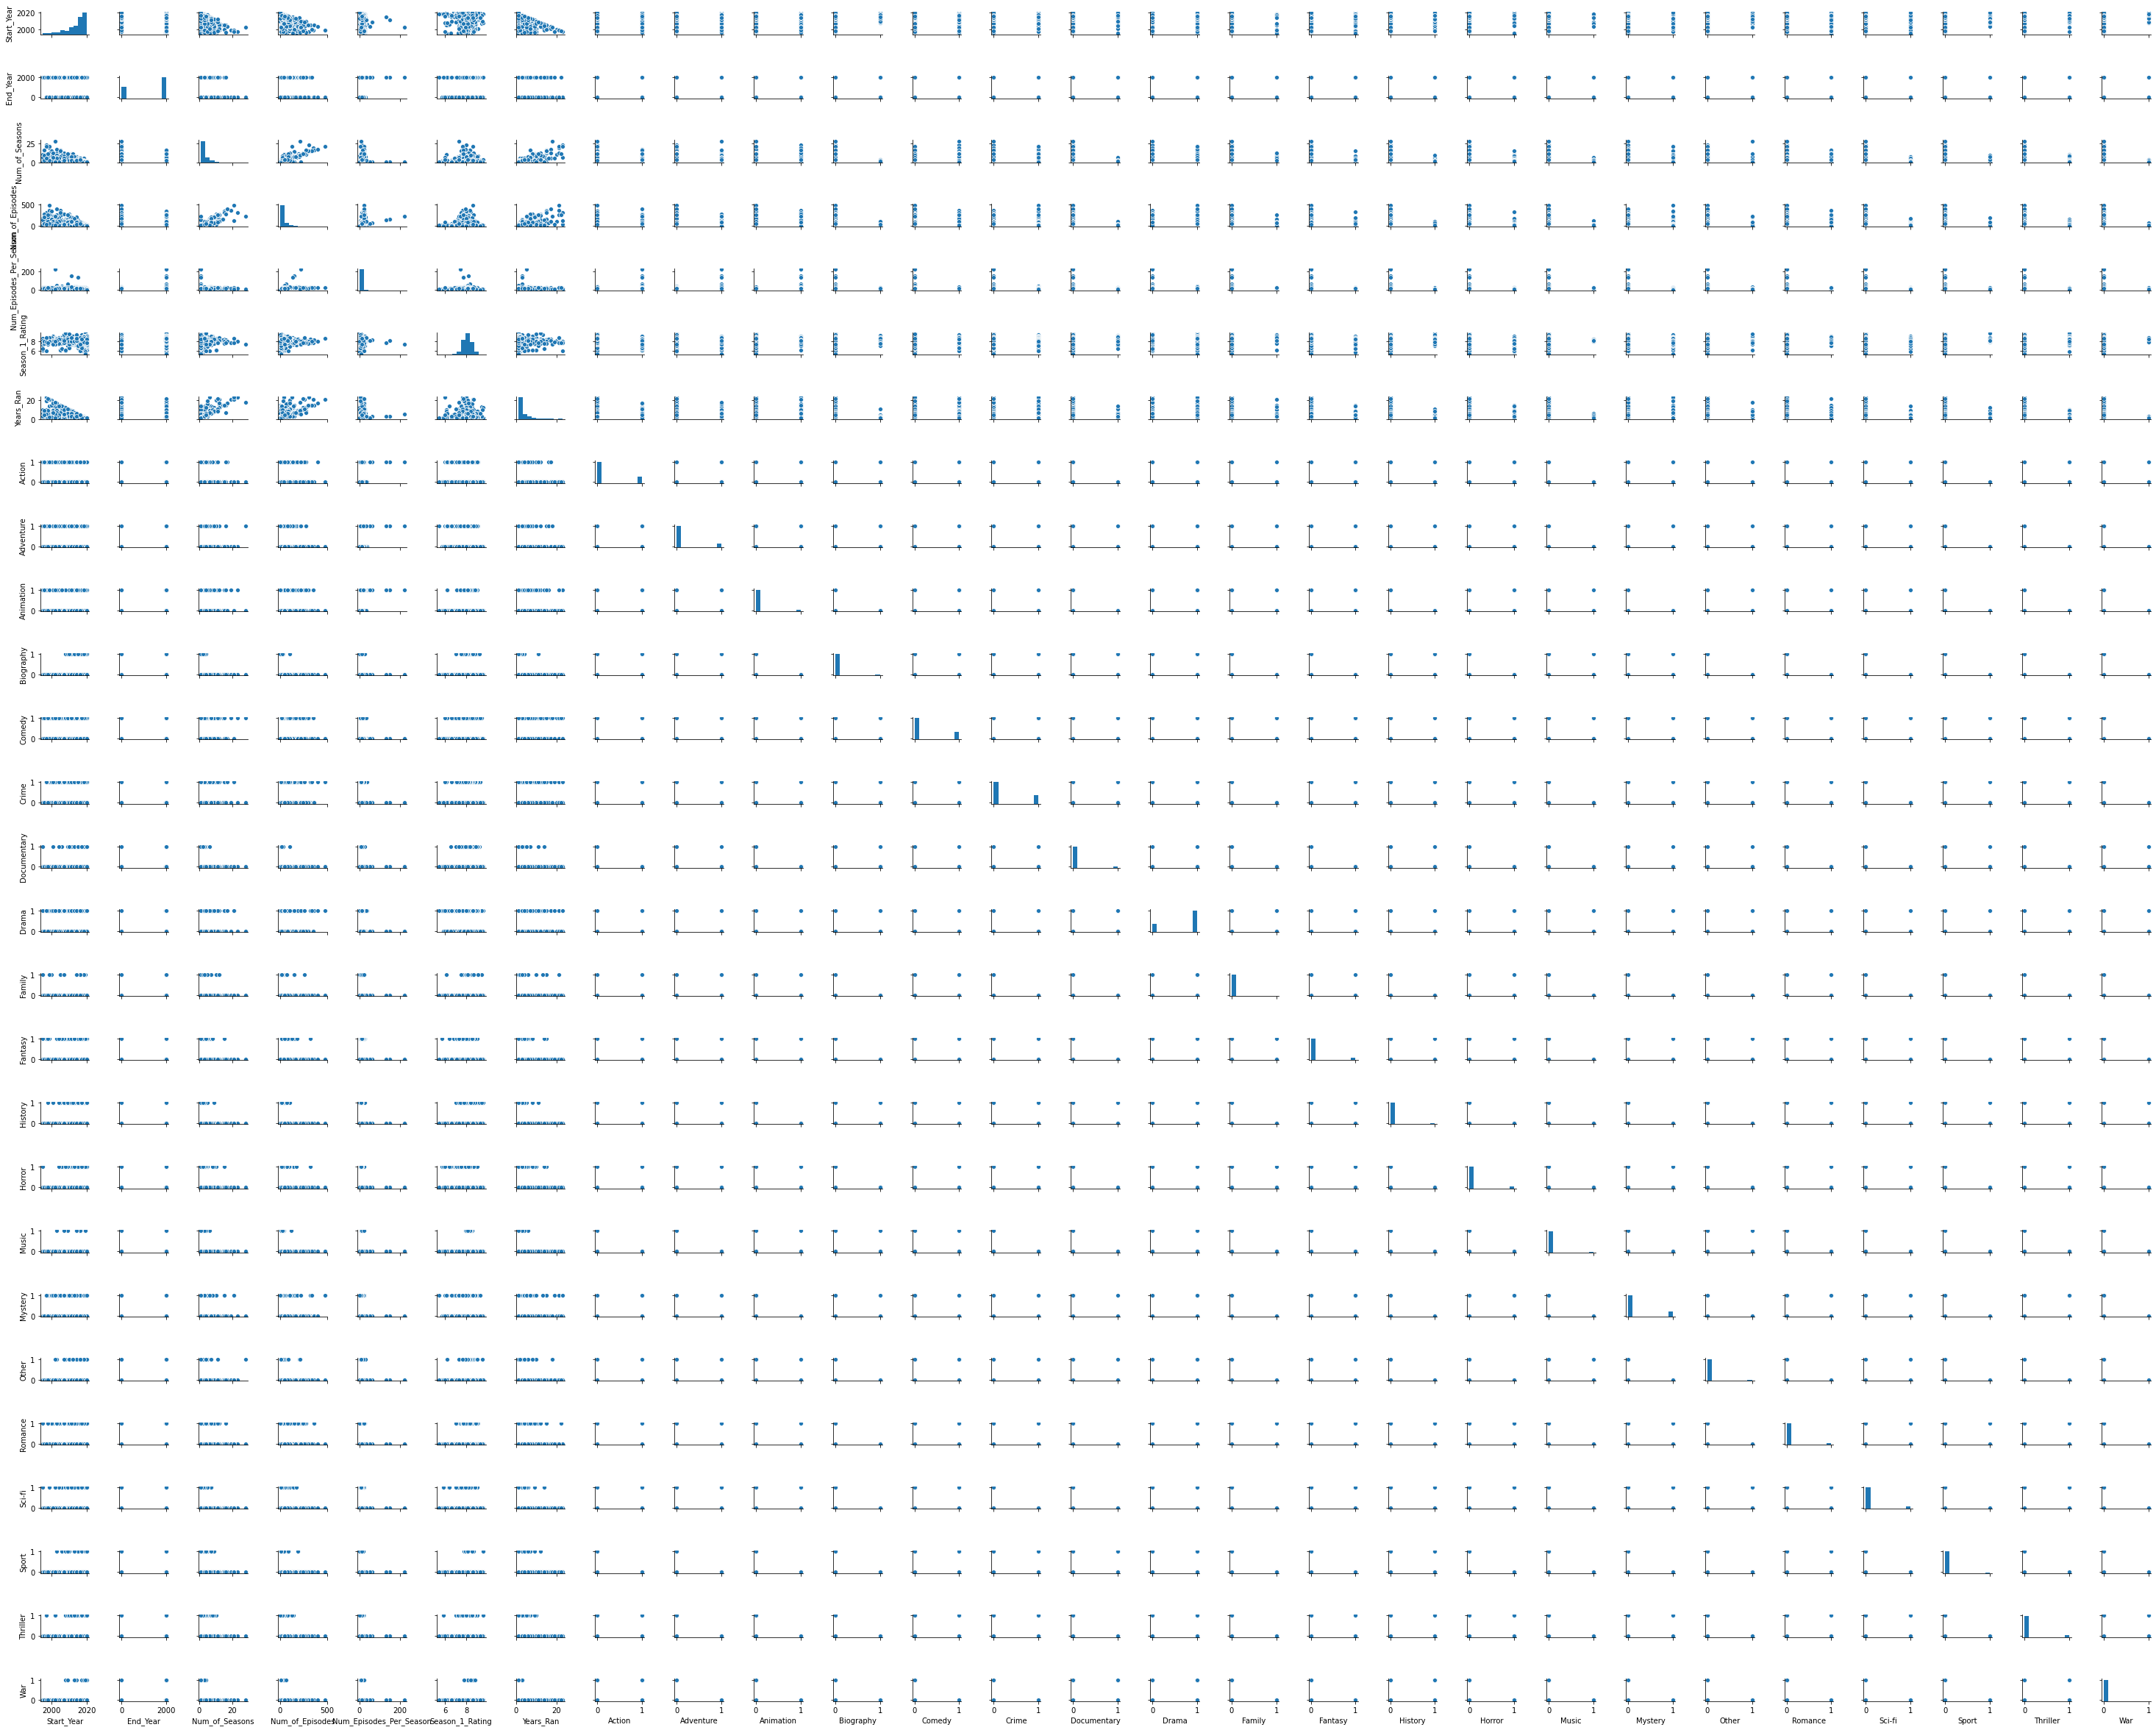

In [15]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(dummy_genre_df, height=1.2, aspect=1.25);

In [16]:
dummy_genre_df.describe()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.604000,1311.64500,3.036000,40.877000,11.716910,8.057400,3.290000,0.23200,0.153000,0.081000,...,0.057000,0.069000,0.010000,0.181000,0.021000,0.068000,0.095000,0.014000,0.089000,0.009000
std,5.835858,960.85876,2.933481,55.961483,10.594048,0.532493,3.429528,0.42232,0.360168,0.272972,...,0.231959,0.253581,0.099549,0.385211,0.143456,0.251872,0.293362,0.117549,0.284886,0.094488
min,1995.000000,0.00000,1.000000,2.000000,1.000000,5.400000,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.00000,1.000000,10.000000,8.000000,7.800000,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,2012.00000,2.000000,20.000000,10.000000,8.100000,2.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,2017.00000,4.000000,46.250000,13.000000,8.400000,4.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,2021.00000,28.000000,478.000000,220.000000,9.600000,23.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
pd.set_option('display.max_columns', None)
dummy_genre_df.head(1)

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.0,9.6,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [10]:
features = ['Start_Year', 'Num_Episodes_Per_Season', 'Season_1_Rating',
            'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
            'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
            'History', 'Horror', 'Music', 'Mystery', 'Other', 'Romance', 
            'Sci-fi', 'Sport', 'Thriller', 'War']


In [21]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = dummy_genre_df[features]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = dummy_genre_df['Num_of_Seasons']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [22]:
lr.score(X, y)

0.34635119956108995

In [23]:
# print out intercept
print(lr.intercept_)

# print out other coefficients
print(lr.coef_)

526.2276961010396
[-0.26003616  0.01408772  0.04273233 -0.41872744  0.05711989 -0.26289845
 -0.70276994  0.57328208  0.5708578  -1.18910201 -0.17681342  0.48517882
 -0.33876808 -0.49384492 -0.14911839 -1.3564908  -0.06383298  1.14786962
  0.21934403 -0.36641017  0.31755687  0.0355656  -0.1528582 ]


## Try to model it using statsmodels

In [24]:
#add a constant since statsmodels.api does not add one by default
#Note: statsmodels.api does not include constant by default
# Add a column of ones with sm.add_constant()
sm.add_constant(X).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
0,1.0,2019,5.00,9.6,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1.0,2011,9.12,9.1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,2011,4.40,8.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,1.0,2010,3.00,8.8,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,2008,12.40,8.8,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     22.49
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.89e-74
Time:                        18:35:53   Log-Likelihood:                -2282.0
No. Observations:                1000   AIC:                             4612.
Df Residuals:                     976   BIC:                             4730.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     526.2277     27.716     18.986      0.000     471.837     580.618
Start_Year                 -0.2600      0.014    -18.923      0.000      -0.287      -0.233
Num_Episodes_Per_Season     0.0141      0.008      1.800      0.072      -0.001       0.029
Season_1_Rating             0.0427      0.148      0.289      0.773      -0.247       0.333
Action                     -0.4187      0.228     -1.838      0.066      -0.866       0.028
Adventure                   0.0571      0.267      0.214      0.831      -0.466       0.581
Animation                  -0.2629      0.332     -0.792      0.429      -0.915       0.389
Biography                  -0.7028      0.434     -1.621      0.105      -1.554       0.148
Comedy                      0.5733      0.236      2.426      0.015       0.110       1.037
Crime                       0.5709      0.207      2.753      0.006       0.164       0.978
Documentary                -1.1891      0.425     -2.797      0.005      -2.023      -0.355
Drama                      -0.1768      0.231     -0.766      0.444      -0.630       0.276
Family                      0.4852      0.659      0.736      0.462      -0.808       1.779
Fantasy                    -0.3388      0.271     -1.252      0.211      -0.870       0.192
History                    -0.4938      0.366     -1.349      0.178      -1.212       0.225
Horror                     -0.1491      0.330     -0.452      0.651      -0.796       0.498
Music                      -1.3565      0.780     -1.740      0.082      -2.886       0.173
Mystery                    -0.0638      0.236     -0.270      0.787      -0.527       0.399
Other                       1.1479      0.552      2.080      0.038       0.065       2.231
Romance                     0.2193      0.325      0.675      0.500      -0.418       0.857
Sci-fi                     -0.3664      0.287     -1.277      0.202      -0.929       0.196
Sport                       0.3176      0.658      0.482      0.630      -0.974       1.609
Thriller                    0.0356      0.289      0.123      0.902      -0.532       0.603
War                        -0.1529      0.838     -0.182      0.855      -1.797       1.491
==============================================================================
Omnibus:                      476.229   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5401.700
Skew:                           1.888   Prob(JB):                         0.00
Kurtosis:                      13.742   Cond. No.                     7.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

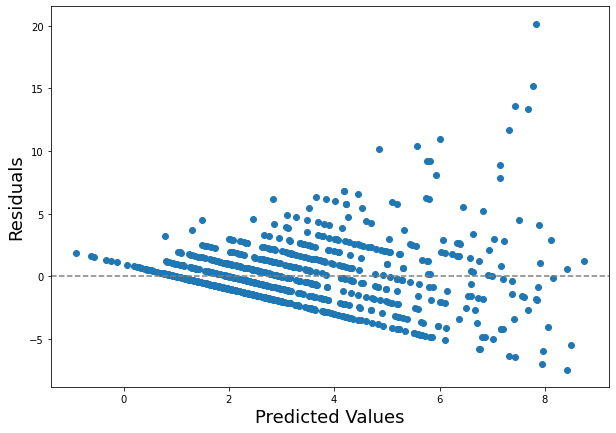

In [26]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

# Now check the score with the df that has the cleaned outliers and includes the dummy variables

In [4]:
# Load data
dummy_genre_df2 = pd.read_pickle('cleaned_outliers_with_dummy_genres.pkl')

# Take a look at the datatypes
dummy_genre_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    1000 non-null   object 
 1   Start_Year               1000 non-null   int64  
 2   End_Year                 1000 non-null   int64  
 3   Genres                   1000 non-null   object 
 4   Num_of_Seasons           1000 non-null   int64  
 5   Num_of_Episodes          1000 non-null   int64  
 6   Num_Episodes_Per_Season  1000 non-null   float64
 7   Season_1_Rating          1000 non-null   float64
 8   Years_Ran                1000 non-null   int64  
 9   Action                   1000 non-null   int64  
 10  Adventure                1000 non-null   int64  
 11  Animation                1000 non-null   int64  
 12  Biography                1000 non-null   int64  
 13  Comedy                   1000 non-null   int64  
 14  Crime                    

In [5]:
dummy_genre_df2.corr()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
Start_Year,1.000000,-0.353229,-0.552322,-0.527568,-0.363657,-0.013036,-0.587728,-0.061381,-0.069251,-0.125625,...,0.041833,0.040804,-0.005238,-0.037548,0.002769,-0.062701,0.069941,-0.002125,0.118156,0.022808
End_Year,-0.353229,1.000000,0.003496,0.046137,0.115590,0.000531,-0.089885,0.044169,0.036978,-0.029178,...,0.044244,-0.015852,0.031380,0.061002,-0.068347,0.014279,0.058487,-0.019870,-0.095053,0.025328
Num_of_Seasons,-0.552322,0.003496,1.000000,0.879105,0.379032,0.012556,0.839150,-0.014038,0.027962,0.067566,...,-0.099765,-0.047628,-0.029112,0.032017,0.059419,0.064603,-0.096177,0.012528,-0.059145,-0.048558
Num_of_Episodes,-0.527568,0.046137,0.879105,1.000000,0.649503,0.010600,0.733839,0.063174,0.074785,0.134527,...,-0.107959,-0.044405,-0.020083,-0.007464,0.007679,0.103427,-0.089346,-0.003238,-0.078237,-0.039545
Num_Episodes_Per_Season,-0.363657,0.115590,0.379032,0.649503,1.000000,0.026964,0.295779,0.245133,0.211492,0.289895,...,-0.143412,-0.012268,0.017063,-0.057290,-0.049408,0.035741,-0.030254,-0.039515,-0.081104,-0.027347
Season_1_Rating,-0.013036,0.000531,0.012556,0.010600,0.026964,1.000000,0.018008,-0.021441,-0.087592,0.017565,...,0.073166,-0.153902,0.030705,-0.079981,0.023516,0.052967,-0.110556,0.041521,-0.002036,0.045428
Years_Ran,-0.587728,-0.089885,0.839150,0.733839,0.295779,0.018008,1.000000,-0.051337,-0.005973,0.089294,...,-0.091266,-0.051807,-0.026095,0.056457,0.040509,0.055948,-0.114965,0.024681,-0.054106,-0.051309
Action,-0.061381,0.044169,-0.014038,0.063174,0.245133,-0.021441,-0.051337,1.000000,0.450821,0.279665,...,-0.073818,-0.093546,-0.055239,-0.203003,-0.063975,-0.139050,0.007756,-0.065492,-0.063631,0.022878
Adventure,-0.069251,0.036978,0.027962,0.074785,0.211492,-0.087592,-0.005973,0.450821,1.000000,0.382896,...,-0.068547,-0.104745,-0.042716,-0.163728,-0.023500,-0.092733,-0.042964,-0.050644,-0.132843,-0.040503
Animation,-0.125625,-0.029178,0.067566,0.134527,0.289895,0.017565,0.089294,0.279665,0.382896,1.000000,...,-0.072990,-0.037440,0.006999,-0.139567,-0.017919,-0.065633,-0.071188,-0.035376,-0.092794,-0.028292


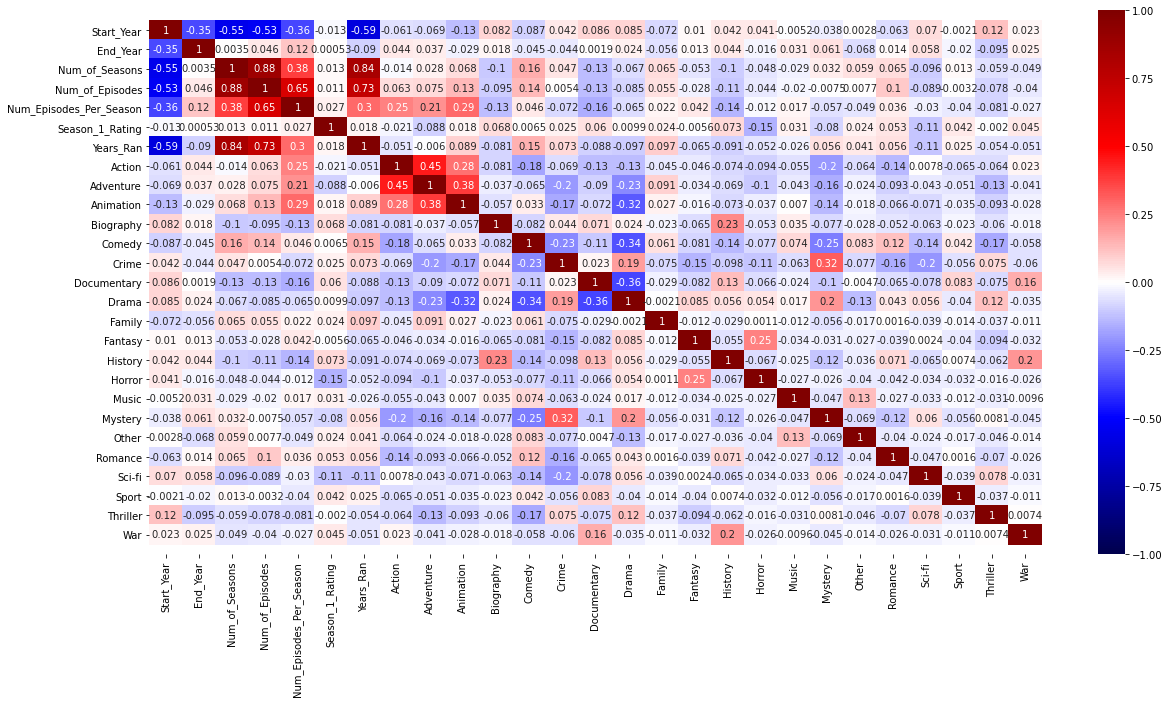

In [6]:
# try a heatmap for the corr matrix
plt.figure(figsize = (20,10))
sns.heatmap(dummy_genre_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(dummy_genre_df2.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


In [7]:
dummy_genre_df2.describe()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.604000,1311.64500,3.049000,40.877000,11.272750,8.057400,3.290000,0.23200,0.153000,0.081000,...,0.057000,0.069000,0.010000,0.181000,0.021000,0.068000,0.095000,0.014000,0.089000,0.009000
std,5.835858,960.85876,2.932439,55.961483,5.859263,0.532493,3.429528,0.42232,0.360168,0.272972,...,0.231959,0.253581,0.099549,0.385211,0.143456,0.251872,0.293362,0.117549,0.284886,0.094488
min,1995.000000,0.00000,1.000000,2.000000,1.000000,5.400000,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.00000,1.000000,10.000000,8.000000,7.800000,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,2012.00000,2.000000,20.000000,10.000000,8.100000,2.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,2017.00000,4.000000,46.250000,13.000000,8.400000,4.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,2021.00000,28.000000,478.000000,44.000000,9.600000,23.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Create an empty model
lr2 = LinearRegression()

# Choose just the X1 column for our data
X = dummy_genre_df2[features]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = dummy_genre_df2['Num_of_Seasons']

# Fit the model 
lr2.fit(X, y)

LinearRegression()

In [12]:
lr2.score(X, y) # woohoo!!!! Getting better!!

0.3879293188479551

In [13]:
# print out intercept
print(lr2.intercept_)

# print out other coefficients
print(lr2.coef_)

465.1517051996659
[-0.22996043  0.11559755 -0.01532988 -0.59947456  0.00174503 -0.48483544
 -0.53451937  0.49269823  0.55251653 -1.04626921 -0.26640814  0.51456606
 -0.43298485 -0.2660687  -0.1834626  -1.50484432 -0.02963716  1.29943446
  0.12117241 -0.39281738  0.41467395  0.07967845 -0.25551702]


In [14]:
#add a constant since statsmodels.api does not add one by default
#Note: statsmodels.api does not include constant by default
# Add a column of ones with sm.add_constant()
sm.add_constant(X).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War
0,1.0,2019,5.00,9.6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.0,2011,9.12,9.1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2011,4.40,8.1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1.0,2010,3.00,8.8,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.0,2008,12.40,8.8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     26.90
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           7.28e-88
Time:                        20:44:43   Log-Likelihood:                -2248.8
No. Observations:                1000   AIC:                             4546.
Df Residuals:                     976   BIC:                             4663.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     465.1517     27.811     16.725      0.000     410.575     519.728
Start_Year                 -0.2300      0.014    -16.685      0.000      -0.257      -0.203
Num_Episodes_Per_Season     0.1156      0.014      7.978      0.000       0.087       0.144
Season_1_Rating            -0.0153      0.143     -0.107      0.915      -0.296       0.266
Action                     -0.5995      0.222     -2.706      0.007      -1.034      -0.165
Adventure                   0.0017      0.258      0.007      0.995      -0.505       0.508
Animation                  -0.4848      0.320     -1.513      0.131      -1.114       0.144
Biography                  -0.5345      0.420     -1.273      0.203      -1.359       0.290
Comedy                      0.4927      0.229      2.156      0.031       0.044       0.941
Crime                       0.5525      0.201      2.755      0.006       0.159       0.946
Documentary                -1.0463      0.412     -2.542      0.011      -1.854      -0.238
Drama                      -0.2664      0.223     -1.193      0.233      -0.705       0.172
Family                      0.5146      0.637      0.807      0.420      -0.736       1.766
Fantasy                    -0.4330      0.262     -1.653      0.099      -0.947       0.081
History                    -0.2661      0.355     -0.749      0.454      -0.963       0.431
Horror                     -0.1835      0.319     -0.575      0.565      -0.809       0.442
Music                      -1.5048      0.754     -1.995      0.046      -2.985      -0.025
Mystery                    -0.0296      0.228     -0.130      0.897      -0.478       0.418
Other                       1.2994      0.534      2.432      0.015       0.251       2.348
Romance                     0.1212      0.315      0.385      0.700      -0.496       0.739
Sci-fi                     -0.3928      0.277     -1.416      0.157      -0.937       0.152
Sport                       0.4147      0.637      0.651      0.515      -0.835       1.664
Thriller                    0.0797      0.280      0.285      0.776      -0.469       0.629
War                        -0.2555      0.810     -0.315      0.753      -1.846       1.335
==============================================================================
Omnibus:                      524.218   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7482.041
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      15.752   Cond. No.                     7.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

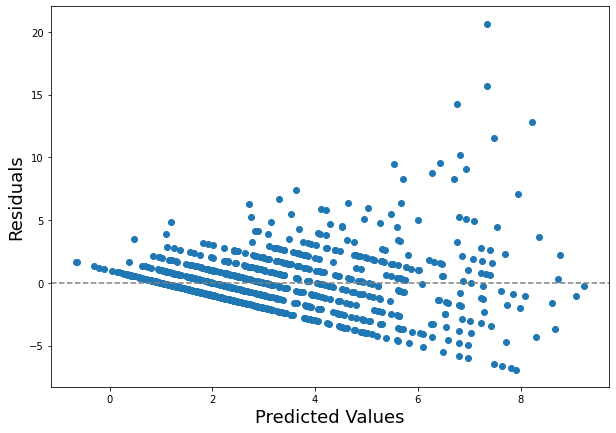

In [16]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);